In [2]:
import importlib
import classesV3.ProCtrlDataLoader as DataLoader
import pandas as pd
import numpy as np
import glob

In [3]:
importlib.reload(DataLoader)
start_path = '../DATA/Jun14_data/'
loadTest = DataLoader.ProCtrlDataLoader(start_path, ['bio','arb','control'],[], ['sess2','sess5', 'sess6'])
loadTest.loaddata()
loadTest.printDict()

loading:  sub-bi08   sess6   pre_trained
loading:  sub-bi08   sess6   post_trained
loading:  sub-bi08   sess5   bio
loading:  sub-bi08   sess5   post_trained
loading:  sub-bi08   sess2   pre_trained
loading:  sub-bi08   sess2   post_trained
loading:  sub-bi06   sess6   pre_trained
loading:  sub-bi06   sess6   post_trained
loading:  sub-bi06   sess5   bio
loading:  sub-bi06   sess5   post_trained
loading:  sub-bi06   sess2   pre_trained
loading:  sub-bi06   sess2   post_trained
loading:  sub-bi07   sess6   pre_trained
loading:  sub-bi07   sess6   post_trained
loading:  sub-bi07   sess5   bio
loading:  sub-bi07   sess5   post_trained
loading:  sub-bi07   sess2   pre_trained
loading:  sub-bi07   sess2   post_trained
loading:  sub-bi09   sess6   pre_trained
loading:  sub-bi09   sess6   post_trained
loading:  sub-bi09   sess5   bio
loading:  sub-bi09   sess5   post_trained
loading:  sub-bi09   sess2   pre_trained
loading:  sub-bi09   sess2   post_trained
loading:  sub-bi13   sess6   pre_tra

In [18]:
from fileinput import filename
from hashlib import new
import os

from sklearn import preprocessing


acc_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*.csv')

time_windows = [(0,49),(50,99),(100,149),(150,199)]

gestures = ['rest','open','close']


new_cols = ['subj', 'group', 'sess', 'pre_post']
for gesture in gestures:
    for window in time_windows:
        string = gesture + '_' + str(window[0]) + '-' + str(window[1]) + 'tp'
        new_cols.append(string)

print(new_cols)

agg_windowed_class_acc = pd.DataFrame(columns=new_cols)

for file in acc_prep_files:
    file_name = file.split('/')[-1]
    file_name = file_name.split('_')

    print(file_name)
    subj = file_name[0].split('-')[-1]
    
    group = 'bio'
    if 'ar' in subj:
        group = 'arb'
    if 'co' in subj:
        group = 'control'
    sess = file_name[1]
    pre_post = file_name[2]

    print(subj,sess,pre_post)

    curr_file = pd.read_csv(file)

    acc_cols = [x for x in curr_file.columns if 'acc' in x]

    rest_cols = [x for x in acc_cols if 'rest' in x]
    open_cols = [x for x in acc_cols if 'open' in x]
    close_cols = [x for x in acc_cols if 'close' in x]
    



    row = pd.DataFrame(columns=new_cols)
    row.loc[0,'subj'] = subj 
    row.loc[0,'group'] = group
    row.loc[0,'sess'] = sess
    row.loc[0,'pre_post'] = pre_post


    for window in time_windows:
        start = window[0]
        stop = window[1]
        for grouping in [(rest_cols,'rest'),(open_cols,'open'),(close_cols,'close')]:
            cols = grouping[0]
            gesture = grouping[1]

            temp_avg = -1

            for column in cols:
                chunk_avg = curr_file.loc[start:stop, column].mean()

                if not chunk_avg:
                    print(subj + sess + 'no chunk?' + column)

                if temp_avg == -1:
                    temp_avg = chunk_avg
                else:
                    temp_avg = (temp_avg + chunk_avg) / 2

            col = gesture + '_' + str(window[0]) + '-' + str(window[1]) + 'tp'
            if temp_avg >= 0:
                row[col] = temp_avg
            # print(row)
    agg_windowed_class_acc = pd.concat([agg_windowed_class_acc, row], axis=0)

    agg_windowed_class_acc = agg_windowed_class_acc.sort_values(by=['group','subj','sess'])

    outpath = 'LearningMeasure/'

    if not os.path.exists(outpath):
        os.makedirs(outpath)

    agg_windowed_class_acc.to_csv(outpath + 'class_avg_prep.csv')





['subj', 'group', 'sess', 'pre_post', 'rest_0-49tp', 'rest_50-99tp', 'rest_100-149tp', 'rest_150-199tp', 'open_0-49tp', 'open_50-99tp', 'open_100-149tp', 'open_150-199tp', 'close_0-49tp', 'close_50-99tp', 'close_100-149tp', 'close_150-199tp']
['sub-bi10', 'sess2', 'post', 'cm', 'prep.csv']
bi10 sess2 post
['sub-bi02', 'sess2', 'pre', 'cm', 'prep.csv']
bi02 sess2 pre
['sub-ar09', 'sess6', 'pre', 'cm', 'prep.csv']
ar09 sess6 pre
['sub-bi15', 'sess6', 'pre', 'cm', 'prep.csv']
bi15 sess6 pre
['sub-bi03', 'sess6', 'pre', 'cm', 'prep.csv']
bi03 sess6 pre
['sub-ar08', 'sess2', 'pre', 'cm', 'prep.csv']
ar08 sess2 pre
['sub-bi14', 'sess2', 'pre', 'cm', 'prep.csv']
bi14 sess2 pre
['sub-ar22', 'sess2', 'post', 'cm', 'prep.csv']
ar22 sess2 post
['sub-ar06', 'sess5', 'post', 'cm', 'prep.csv']
ar06 sess5 post
['sub-ar10', 'sess6', 'post', 'cm', 'prep.csv']
ar10 sess6 post
['sub-co17', 'sess6', 'post', 'cm', 'prep.csv']
co17 sess6 post
['sub-ar21', 'sess6', 'post', 'cm', 'prep.csv']
ar21 sess6 post
[

In [22]:
path = os.getcwd()
path = path + '/LearningMeasure/'

prepped_lm_files = glob.glob(path + 'class_avg_prep.csv')



output_df = pd.DataFrame(columns=['group','sess','subj','pre_post','gesture','time_window','class_acc'])



for path in prepped_lm_files:
    file = pd.read_csv(path)
    for window in time_windows:
        win_code = str(window[0]) + '-' + str(window[1]) + 'tp'
        for gesture in ['rest','open','close']:

            relevant_cols = [x for x in file.columns if gesture and win_code in x]
            for col in relevant_cols:
                for i in range(len(file)):
                    group = file.loc[i, 'group']
                    subj = file.loc[i,'subj']
                    sess = file.loc[i,'sess']
                    pre_post = file.loc[i,'pre_post']
                    class_acc = file.loc[i,col]
                    
                    row = [group,sess,subj,pre_post,gesture,win_code,class_acc]
                    output_df.loc[len(output_df)] = row


multi = output_df.set_index(['group','sess','subj','pre_post','gesture','time_window'])

outpath = 'LearningMeasure/'
output_df.to_csv(outpath + 'non-multi_test.csv')
multi.to_csv(outpath + 'multi_test.csv')


In [26]:
# path = os.getcwd()
# path = path + '/LearningMeasure/'
# prepped_lm_files = glob.glob(path + 'class_avg_prep.csv')

# output_df = pd.DataFrame(columns=['group','sess','subj','gesture','time_window','class_acc'])

test = pd.MultiIndex.from_frame(output_df)

prepped_file = pd.read_csv(prepped_lm_files[0])

win_codes = []
for window in time_windows:
    win_codes = [*win_codes, str(window[0]) + '-' + str(window[1]) + 'tp']

print(prepped_file['subj'].unique())
print(win_codes)

arrays = [
    prepped_file['subj'].unique(),
    ['sess2','sess5','sess6'],
    ['pre','post'],
    ['rest','open','close'],
    win_codes
]

index = pd.MultiIndex.from_product(arrays, names=['subj','sess','pre_post','gesture','time_window'])

df = pd.DataFrame(index=index,columns=['group','class_acc'])
df.to_csv(outpath + 'multi-multi_test.csv')

idx = pd.IndexSlice

for i in range(len(prepped_file)):
    subj = prepped_file.loc[i,'subj']
    sess = prepped_file.loc[i,'sess']
    pre_post = prepped_file.loc[i,'pre_post']

    for gesture in gestures:
        for window in win_codes:
            cols = [x for x in prepped_file.columns if gesture in x and window in x]
            for column in cols:

                val = prepped_file.loc[i,column]

                df.loc[idx[subj,sess,pre_post,gesture,window], 'class_acc'] = val

                group = 'bio'
                if 'ar' in subj:
                    group = 'arb' 
                if 'co' in subj:
                    group = 'control'

                df.loc[idx[subj,sess,pre_post,gesture,window], 'group'] = group
df = df.sort_values(['subj','sess','pre_post','gesture','time_window'])
df.to_csv(outpath + 'multi-multi_test_final.csv')

['ar06' 'ar07' 'ar08' 'ar09' 'ar10' 'ar11' 'ar12' 'ar13' 'ar14' 'ar15'
 'ar16' 'ar17' 'ar18' 'ar19' 'ar20' 'ar21' 'ar22' 'bi02' 'bi03' 'bi04'
 'bi05' 'bi06' 'bi07' 'bi08' 'bi09' 'bi10' 'bi11' 'bi12' 'bi13' 'bi14'
 'bi15' 'bi16' 'bi17' 'bi18' 'bi19' 'bi20' 'bi21' 'co01' 'co03' 'co04'
 'co05' 'co07' 'co08' 'co09' 'co10' 'co11' 'co12' 'co13' 'co14' 'co15'
 'co16' 'co17' 'co18' 'co19' 'co20']
['0-49tp', '50-99tp', '100-149tp', '150-199tp']


In [27]:
re_save = glob.glob(outpath + 'multi*final*')

for file in re_save:
    temp = pd.read_csv(file)

    temp = temp[temp['class_acc'].notna()]

    temp.to_csv(outpath + 'tagged_classacc_avgs.csv')

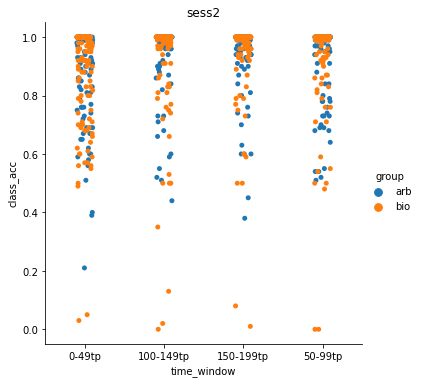

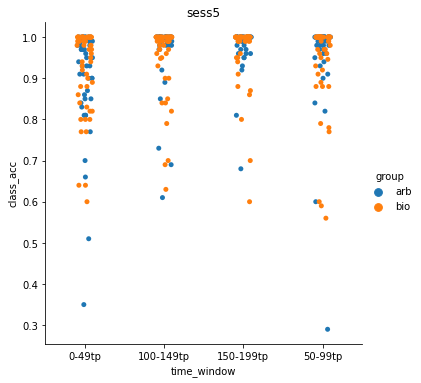

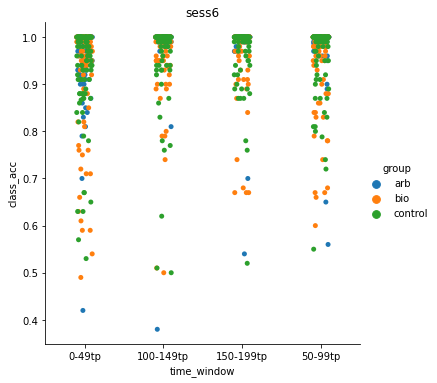

In [33]:
# hold = df.loc[idx[:,'sess2','open',:]]
# hold.to_csv(outpath + 'slice_testing.csv')
import seaborn as sns
import matplotlib.pyplot as plt

re_save = glob.glob(outpath + 'multi*final*')

sessions = ['sess2','sess5','sess6']
groups = ['bio','arb','control']
gestures = ['rest','open','close']

for file in re_save:
    temp = pd.read_csv(file)

    for sess in sessions:
    
        hold = temp.loc[temp['sess'] == sess]
        

        # hold = temp.loc[idx[:,:,gesture,:]]
        hold.to_csv(outpath + 'what.csv')

        hold = hold.dropna()

        ax = sns.catplot(x='time_window',y='class_acc', data=hold, hue='group').set(title=sess)

    # print(hold)
    
    # sns.scatterplot(x='time_windows',y='class_acc', data = hold)

    # hold.plot.scatter(x='time_window',y='class_acc', c='sess')
    # print(hold.loc[idx[,,,:]])

    # pd.DataFrame.plot.scatter(x=hold['time_window'],y=hold['class_acc'],c=hold['sess'])

    # fig, ax = plt.subplot()
    # ax.scatter(hold['time_window'], hold['class_acc'], c=hold['sess'])
    # plt.show()

In [31]:
averages = pd.DataFrame(columns= ['group','sess','tp_window','avg'])

for file in re_save:
    temp = pd.read_csv(file)

    for sess in sessions:
        for group in groups:
            for window in temp['time_window'].unique():
                print(group, sess, window)

                # hold = temp.loc[(sess,window,group)]

                
                
                hold = temp.loc[(temp['sess'] == sess) & (temp['group'] == group) & (temp['time_window'] == window)]

                print(hold)

                vals = hold['class_acc']
                print(vals)
                avg = -1
                if len(vals) > 0:
                    avg = np.sum(vals) / len(vals)
                else:
                    break

                row = [group,sess,window,avg]

                averages.loc[len(averages)] = row

    
    averages.to_csv(outpath + 'Average_accs.csv')

    
        # hold = temp.loc[temp['sess'] == sess]
        

        # # hold = temp.loc[idx[:,:,gesture,:]]
        # hold.to_csv(outpath + 'what.csv')

        # hold = hold.dropna()

        # ax = sns.catplot(x='time_window',y='class_acc', data=hold, hue='group').set(title=sess)

bio sess2 0-49tp
      subj   sess pre_post gesture time_window group  class_acc
1224  bi02  sess2     post   close      0-49tp   bio       0.03
1228  bi02  sess2     post    open      0-49tp   bio       0.50
1232  bi02  sess2     post    rest      0-49tp   bio       0.90
1236  bi02  sess2      pre   close      0-49tp   bio       0.70
1240  bi02  sess2      pre    open      0-49tp   bio       0.56
...    ...    ...      ...     ...         ...   ...        ...
2596  bi21  sess2     post    open      0-49tp   bio       0.92
2600  bi21  sess2     post    rest      0-49tp   bio       0.85
2604  bi21  sess2      pre   close      0-49tp   bio       1.00
2608  bi21  sess2      pre    open      0-49tp   bio       0.91
2612  bi21  sess2      pre    rest      0-49tp   bio       0.83

[120 rows x 7 columns]
1224    0.03
1228    0.50
1232    0.90
1236    0.70
1240    0.56
        ... 
2596    0.92
2600    0.85
2604    1.00
2608    0.91
2612    0.83
Name: class_acc, Length: 120, dtype: float64
bio

In [40]:
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111)

rest_x = [x for x in prepped_lm_files.columns if 'rest' in x]

for window in time_windows:

    

/Users/moninghoffjc/Documents/HSP/ProCtrlPipeline_Github/LearningMeasure/
['/Users/moninghoffjc/Documents/HSP/ProCtrlPipeline_Github/LearningMeasure/class_avg_prep.csv']


## Confusion Matrix Stuff

In [6]:
def prep_cm_dfs(group,subject,sess):
    session = loadTest.data_dict[group][subject][sess]
    

    for pre_post in session.keys():
        hold = pd.DataFrame(index = range(400))
        if 'trained' in pre_post:
            print(pre_post)
            df = session[pre_post]
            pre_post_string = 'pre' 
            if 'post' in pre_post:
                pre_post_string = 'post'

            print(pre_post_string)

            for mc in df.chunk_bounds:  
                j = 0
                for bounds in df.chunk_bounds[mc]:
                    j += 1
                    start = bounds[0]
                    end = bounds[1]

                    chunk_goal = df.armgame_df.loc[start:end, 'goal']

                    chunk_class = df.armgame_df.loc[start:end, 'class']

                    chunk_acc = np.where(chunk_goal == chunk_class, 1, 0)

                    npArray = np.array(chunk_acc)
                    val = np.argmax(npArray > 0)

                    chunk_goal = pd.Series(chunk_goal[val:-1])
                    chunk_class = pd.Series(chunk_class[val:-1])
                    chunk_acc = pd.Series(chunk_acc[val:-1])

                        # series = pd.Series(series[val:])

                    chunk_goal = chunk_goal.reset_index(drop=True)
                    chunk_class = chunk_class.reset_index(drop=True)
                    chunk_acc = chunk_acc.reset_index(drop=True)

                    if len(chunk_class.index) > len(hold.index):
                        new_df = pd.DataFrame(index = range(len(chunk_class.index)))
                        hold = new_df.join(hold)
                        

                    col_string = mc + '_' + str(j) + '_' + pre_post + '_'
                    hold[col_string + 'class'] = chunk_class
                    hold[col_string + 'goal'] = chunk_goal
                    hold[col_string + 'acc'] = chunk_acc

            file_name = 'cm_dfs/ind_sub_acc_prep/' + subject +'_' + sess + '_' + pre_post_string + '_cm_prep.csv'

            hold.to_csv(file_name)


for group in loadTest.data_dict:
    for subj in loadTest.data_dict[group]:
        for sess in loadTest.data_dict[group][subj]:
            prep_cm_dfs(group, subj, sess)

pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pre_trained
pre
post_trained
post
post_trained
post
pre_trained
pre
post_trained
post
pr

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.multiclass import unique_labels
from statistics import mode
import seaborn as sn
import matplotlib.pyplot as plt

def get_bits(path):
    file = path.split('/')[-1]
    bits = file.split('_')
    subj = bits[0]
    subj = subj.split('-')[-1]
    sess = bits[1]

    return subj,sess

def plot_cmn(cmn, subj, sess):

    save_path = 'cm_figs/ind/' + subj + '_' + sess + '_cm'
    plt.figure(figsize=(10,8))
    sn.heatmap(cmn, annot=True,fmt='.2f',xticklabels=[0,17,18],yticklabels=[0,17,18])

    plt.title(subj + '_' + sess)
    plt.ylabel('Classifier Output')
    plt.xlabel('Goal Output')
    
    plt.savefig(save_path)
    plt.close()



cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*.csv')

time_windows = [(0,99),(50,149),(100,199),(0,49),(50,99),(100,149),(150,199)]

for window in time_windows:
    start = window[0]
    end = window[1]
    print('window: ' + str(start) + '-' + str(end))

    tp_window_cm_df = pd.DataFrame(columns=['subj','sess','VAL1','VAL2','VAL3','VAL4','VAL5','VAL6','VAL7','VAL8','VAL9'])

    num_tp = end-start
    tp_range = str(start) + '-' + str(end) + '_ticks'

    for file in cm_prep_files:
        subj,sess = get_bits(file)
        df = pd.read_csv(file)
        class_df = []
        goal_df = []

        for col in df.columns:
            temp_list = df.loc[start:end,col].tolist()
            temp_list = [item for item in temp_list if not pd.isna(item)]

            if not temp_list:
                continue

            if 'class' in col:
                class_df.extend(temp_list)
            elif 'goal' in col:
                goal_df.extend(temp_list)


        if len(class_df) != len(goal_df):
            print('mismatch: ' + len(class_df) + ' vs. ' + len(goal_df))

        if not all(x in class_df for x in [0,17,18]):
            print(subj,sess,' missing some value')
            continue

        labels = unique_labels(class_df, goal_df)

        cm = confusion_matrix(class_df,goal_df, labels=[0.,17.,18.])
        cmn = cm.astype('float') / cm.sum(axis=0)

        if 3 != np.sum(np.sum(cmn,0)):
            print('bad stuff')
            print(subj, sess, window)

        plot_cmn(cmn, subj, sess)

        if goal_df.count(0) == 0 or goal_df.count(17) == 0 or goal_df.count(18) == 0:
            continue
        rest_acc = class_df.count(0) / goal_df.count(0)
        open_acc = class_df.count(17) / goal_df.count(17)
        close_acc = class_df.count(18) / goal_df.count(18)


        row = [subj,sess] 

        for item in cmn:
            row.extend(item)

        tp_window_cm_df.loc[len(tp_window_cm_df)] = row

    
    tp_window_cm_df = tp_window_cm_df.sort_values(by=['subj','sess'])

    out_path = 'cm_dfs/' + str(num_tp+1) + 'tp/' + tp_range + '.csv'

    tp_window_cm_df.to_csv(out_path, index = False)


window: 0-99
['bi03', 'sess2', 0.855, 0.0, 0.0, 0.1125, 1.0, 0.0, 0.0325, 0.0, 1.0]
['ar14', 'sess2', 0.995, 0.005, 0.0, 0.0025, 0.9825, 0.045, 0.0025, 0.0125, 0.955]
['ar20', 'sess2', 0.6825, 0.0, 0.0, 0.025, 1.0, 0.045, 0.2925, 0.0, 0.955]
bi16 sess5  missing some value
['ar08', 'sess2', 0.7175, 0.0025, 0.0025, 0.1875, 0.9125, 0.025, 0.095, 0.085, 0.9725]
['ar11', 'sess2', 0.81, 0.0, 0.0, 0.145, 0.7775, 0.0025, 0.045, 0.2225, 0.9975]
['bi06', 'sess2', 0.89, 0.0, 0.0, 0.095, 1.0, 0.01, 0.015, 0.0, 0.99]
['ar18', 'sess5', 0.925, 0.0, 0.0, 0.075, 1.0, 0.0, 0.0, 0.0, 1.0]
['bi13', 'sess5', 0.94, 0.05, 0.0, 0.06, 0.71, 0.07, 0.0, 0.24, 0.93]
['bi02', 'sess2', 0.8775, 0.36, 0.33, 0.0925, 0.6, 0.255, 0.03, 0.04, 0.415]
['ar15', 'sess2', 0.8525, 0.175, 0.0175, 0.075, 0.82, 0.0, 0.0725, 0.005, 0.9825]
['bi17', 'sess5', 0.99, 0.0, 0.0, 0.0, 0.9230769230769231, 0.1, 0.01, 0.07692307692307693, 0.9]
['ar09', 'sess2', 0.8175, 0.21388888888888888, 0.0, 0.1, 0.6222222222222222, 0.135, 0.0825, 0.1638

<ipython-input-6-87a5b1e3b002>:74: RuntimeWarning: invalid value encountered in true_divide
  cmn = cm.astype('float') / cm.sum(axis=0)


['bi17', 'sess2', 1.0, 0.0, 0.0, 0.0, 0.97, 0.005, 0.0, 0.03, 0.995]
['ar21', 'sess5', 1.0, 0.0, 0.0, 0.0, 1.0, 0.01, 0.0, 0.0, 0.99]
['ar09', 'sess5', 1.0, 0.01, 0.0, 0.0, 0.93, 0.0, 0.0, 0.06, 1.0]
['ar11', 'sess5', 1.0, 0.01, 0.0, 0.0, 0.97, 0.01, 0.0, 0.02, 0.99]
['bi06', 'sess5', 0.99, 0.01, 0.0, 0.0, 0.99, 0.0, 0.01, 0.0, 1.0]
['ar18', 'sess2', 0.995, 0.125, 0.0, 0.005, 0.67, 0.055, 0.0, 0.205, 0.945]
['bi13', 'sess2', 0.79, 0.0, 0.0, 0.21, 1.0, 0.0, 0.0, 0.0, 1.0]
['bi03', 'sess5', 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
['ar14', 'sess5', 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]
['ar20', 'sess5', 0.98, 0.0, 0.0, 0.0, 1.0, 0.0, 0.02, 0.0, 1.0]
['bi16', 'sess2', 1.0, 0.02, 0.0, 0.0, 0.8333333333333334, 0.0, 0.0, 0.14666666666666667, 1.0]
['ar08', 'sess5', 1.0, 0.0, 0.0, 0.0, 0.96, 0.05, 0.0, 0.04, 0.95]


In [7]:
cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*.csv')

bio_s2_cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*bi*sess2*.csv')
bio_s5_cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*bi*sess5*.csv')
arb_s2_cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*ar*sess2*.csv')
arb_s5_cm_prep_files = glob.glob('cm_dfs/ind_sub_acc_prep/*ar*sess5*.csv')

file_groups = [bio_s2_cm_prep_files,bio_s5_cm_prep_files,arb_s2_cm_prep_files,arb_s5_cm_prep_files]


def group_cm(cmn, num_tp, tp_range, group, sess):
    save_path = 'cm_figs/' + str(num_tp + 1) + 'tp/' + group + '_' + sess + '_' + tp_range + '_cm'

    plt.figure(figsize=(10,8))
    sn.heatmap(cmn, annot=True,fmt='.2f',xticklabels=[0,17,18],yticklabels=[0,17,18], vmin=0, vmax=1)

    plt.title(group + '_' + sess)
    plt.ylabel('Classifier Output')
    plt.xlabel('Goal Output')
    
    plt.savefig(save_path)
    plt.close()

for grouping in file_groups:
    for window in time_windows:
        start = window[0]
        end = window[1]
        print('window: ' + str(start) + '-' + str(end))

        tp_window_cm_df = pd.DataFrame(columns=['subj','sess','VAL1','VAL2','VAL3','VAL4','VAL5','VAL6','VAL7','VAL8','VAL9'])

        num_tp = end-start
        tp_range = str(start) + '-' + str(end) + '_ticks'

        class_df = []
        goal_df = []

        group_key = 'bio'
        sess_key = 'sess2'

        for file in grouping:
            subj,sess = get_bits(file)
            df = pd.read_csv(file)
            
            if 'ar' in subj:
                group_key = 'arb'
            if sess_key != sess:
                sess_key = sess


            for col in df.columns:
                temp_list = df.loc[start:end,col].tolist()
                temp_list = [item for item in temp_list if not pd.isna(item)]

                if not temp_list:
                    continue

                if 'class' in col:
                    class_df.extend(temp_list)
                elif 'goal' in col:
                    goal_df.extend(temp_list)


            if len(class_df) != len(goal_df):
                print('mismatch: ' + len(class_df) + ' vs. ' + len(goal_df))
                print('after: ', file)

        if not all(x in class_df for x in [0,17,18]):
            print(subj,sess,' missing some value')
            continue
        
        labels = unique_labels(class_df, goal_df)

        cm = confusion_matrix(class_df,goal_df, labels=[0.,17.,18.])
        cmn = cm.astype('float') / cm.sum(axis=0)

        group_cm(cmn,num_tp,tp_range,group_key,sess_key)

        row = [group_key,sess_key]

        for item in cmn:
            row.extend(item)
        
        tp_window_cm_df.loc[len(tp_window_cm_df)] = row
    
    tp_window_cm_df = tp_window_cm_df.sort_values(by=['subj','sess'])

    out_path = 'cm_dfs/' + str(num_tp+1) + 'tp/' + group_key + '_' + sess_key + '_' + tp_range + '.csv'

    tp_window_cm_df.to_csv(out_path, index = False)

    



window: 0-99
window: 50-149
window: 100-199
window: 0-49
window: 50-99
window: 100-149
window: 150-199
window: 0-99
window: 50-149
window: 100-199
window: 0-49
window: 50-99
window: 100-149
window: 150-199
window: 0-99
window: 50-149
window: 100-199
window: 0-49
window: 50-99
window: 100-149
window: 150-199
window: 0-99
window: 50-149
window: 100-199
window: 0-49
window: 50-99
window: 100-149
window: 150-199


### Basic Data Display Methods

In [ ]:
# # Displays basic class_means_file df (raw EMG data, accuracy values)

# # test_ag_file = loadTest.data_dict['arb']['sub-ar07']['sess2']['post_trained']


# test_ag_file.armgame_df


# cm_df = test_ag_file.raw_cm_features

# hi = test_ag_file.feature_df.loc[(0,1):(0,8),1]

# test_ag_file.diff_from_f1(18)
# test_ag_file.f1_distances

# classAccData = loadTest.aggregate_sess_x_group_df(['bio','arb', 'control'])

In [ ]:
#loadTest.print_acc_lines(['arb','bio']) # ahem

In [ ]:
# test_ag_file.armgame_df

In [ ]:
# test_ag_file.diff_from_f1(0)

## Shaded error bars printer


In [ ]:
# take in data
# find accuracy vals per timepoint
# avg within subject for all gestures, within one session
# Avg across subject avgs, plot avg line with shaded error bars

def shaded_error_prep(hold):
    hold = hold.reindex(sorted(hold.columns), axis = 1)

    mean = hold.mean(axis=1,skipna=True)

    median = pd.DataFrame(hold.median(axis=1,skipna=True))

    ## Percentiles

    upper_percentile = pd.DataFrame(np.nanpercentile(hold, 75, axis = 1))
    mid_percentile = pd.DataFrame(np.nanpercentile(hold, 50, axis = 1))
    low_percentile = pd.DataFrame(np.nanpercentile(hold, 25, axis = 1))

    per10 = pd.DataFrame(np.nanpercentile(hold, 10, axis = 1))
    per20 = pd.DataFrame(np.nanpercentile(hold, 20, axis = 1))
    per30 = pd.DataFrame(np.nanpercentile(hold, 30, axis = 1))
    per40 = pd.DataFrame(np.nanpercentile(hold, 40, axis = 1))

    min = hold.min(axis=1)

    max = hold.max(axis=1)

    std = hold.std(axis=1, skipna = True,)

    hold['10%'] = per10
    hold['20%'] = per20
    hold['30%'] = per30
    hold['40%'] = per40

    hold['mean'] = mean
    hold['75%'] = upper_percentile
    hold['25%'] = low_percentile
    hold['median'] = median

    hold['min'] = min
    hold['max'] = max 
    hold['std'] = std

    return hold


def make_sess_rolling_acc_df(group, subject, sess):

    session = loadTest.data_dict[group][subject][sess]
    hold = pd.DataFrame(index = range(400))

    for pre_post in session.keys():
        if 'trained' in pre_post:
            df = session[pre_post]
            df.calc_acc()

            for mc in df.chunk_bounds:  
                j = 0
                for bounds in df.chunk_bounds[mc]:
                    j += 1
                    start = bounds[0]
                    end = bounds[1]

                    chunk_data = df.armgame_df.loc[start:end, 'rolling_acc_bin25']

                    chunk_data = chunk_data[:-1]

                    npArray = np.array(chunk_data)
                    val = np.argmax(npArray > 0)

                    chunk_data = pd.Series(chunk_data[val:])

                    chunk_data = chunk_data.reset_index(drop=True)

                    chunk_data = chunk_data.reset_index(drop = True)
                    if len(chunk_data.index) > len(hold.index):
                        new_df = pd.DataFrame(index = range(len(chunk_data.index)))
                        hold = new_df.join(hold)
                        
                    hold[mc + '_' + str(j) + '_' + pre_post] = chunk_data

    hold = shaded_error_prep(hold)

    file_name = 'chunk_accs/subj_accs/' + subject + '_' + sess + '_chunk_acc.csv'

    hold.to_csv(file_name)

for group in loadTest.data_dict:
    for subj in loadTest.data_dict[group]:
        for sess in loadTest.data_dict[group][subj]:
            make_sess_rolling_acc_df(group, subj, sess)
    

In [ ]:
test_files = glob.glob("chunk_accs/subj_accs/*.csv")

def remove_leading_0s(file):

    curr_file = pd.read_csv(file)

    new_file = pd.DataFrame()

    for column in curr_file.columns:
        list = curr_file[column]
        # val = list.index(next(filter(lambda x: x!=0, list)))
        

        npArray = np.array(list)
        val = np.argmax(npArray > 0)

        list = pd.Series(list[val:])

        list = list.reset_index(drop=True)

        if len(list.index) > len(new_file.index):
            temp_df = pd.DataFrame(index = range(len(list.index)))
            new_file = temp_df.join(new_file)
        
        new_file[column] = list
        # new_file.assign(column = list.values)

    new_file.to_csv(file)

        

## Builds Shaded Error Graphs for a single participant

In [ ]:
import plotly.graph_objs as go 
import glob
from plotly.subplots import make_subplots

def acc_shaded_error(folder, name, df_list):
    rows = len(df_list)
    fig = make_subplots(rows=rows, cols=1)

    i = 0
    for df in df_list:
        i += 1
        fig = single_shaded_error_fig(fig,df,i, 1)

    save_path = 'chunk_accs_figs/' + folder + '/' + name + '.png'

    fig.write_image(save_path)

def single_shaded_error_fig(fig, df, row, col):

    legend = True
    if row*col > 1:
        legend = False

    x_vals = list(df.index)
    y_vals = df['median']
    y_10 = df['10%']
    y_20 = df['20%']
    y_30 = df['30%']
    y_40 = df['40%']
    y_75 = df['75%']


    fig.add_scatter(
        name = '10%',
        x = x_vals,
        y = y_10,
        mode = 'lines',
        marker = dict(color="#33ccff"),
        line = dict(width=1.5),
        showlegend=legend,
        row = row,
        col = col
    )
    fig.add_scatter(
        name = '20%',
        x = x_vals,
        y = y_20,
        mode = 'lines',
        marker = dict(color="#03fce3"),
        line = dict(width=1.5),
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=legend,
        row = row,
        col = col
    )
    fig.add_scatter(
        name = '30%',
        x = x_vals,
        y = y_30,
        mode = 'lines',
        marker = dict(color="#9dfc03"),
        line = dict(width=1.5),
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=legend,
        row = row,
        col = col
    )
    fig.add_scatter(
        name = '40%',
        x = x_vals,
        y = y_40,
        mode = 'lines',
        marker = dict(color="#ffd966"),
        line = dict(width=1.5),
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=legend,
        row = row,
        col = col
    )
    fig.add_scatter(
        name = 'median',
        x = x_vals,
        y = y_vals,
        mode = 'lines',
        marker = dict(color="#ff6666"),
        line = dict(width=1.5),
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=legend,
        row = row,
        col = col
    )
    fig.add_scatter(
        name = '75%',
        x = x_vals,
        y = y_75,
        mode = 'lines',
        marker = dict(color="#cc33ff"),
        line = dict(width=1.5),
        showlegend=legend,
        fillcolor = 'rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        row = row,
        col = col
    )    
    
    fig.update_layout(
        yaxis_title='rolling acc (25ticks)',
        title=name,
        hovermode="x"
    )

    return fig


def get_subjsess(path):
    file = path.split('/')[-1]

    hold = file.split('_')

    subj = hold[0]
    sess = hold[1]

    return subj,sess




In [ ]:
files = glob.glob("chunk_accs/subj_accs/*.csv")

for path in files:
    df = pd.read_csv(path)

    subj, sess = get_subjsess(path)

    name = subj + '_' + sess

    print(name)

    acc_shaded_error('subj_accs_figs', name,[df])

## Build Shaded Error across participant within group within gesture

In [ ]:
bio_files = glob.glob("chunk_accs/subj_accs/*bi*.csv")
arb_files = glob.glob("chunk_accs/subj_accs/*ar*.csv")

## Remove problem participants

bi_rest = pd.DataFrame()
bi_open = pd.DataFrame()
bi_close = pd.DataFrame()
ar_rest = pd.DataFrame()
ar_open = pd.DataFrame()
ar_close = pd.DataFrame()

sess2_files = [file for file in files if 'sess2' in file]
sess5_files = [file for file in files if 'sess5' in file]

which_files = sess5_files
session = 'sess5'

for path in which_files:
    subj,sess = get_subjsess(path)
    name = subj + '_' + sess + '_'
    df = pd.read_csv(path)
    rest = 0
    open = 0
    close = 0
    if 'sub-bi' in path:
        for column in df.columns.values:
            if 'rest' in column:
                rest += 1
                bi_rest[name + column] = df[column]
            elif 'open' in column:
                open += 1
                bi_open[name + column] = df[column]
            elif 'close' in column:
                close += 1
                bi_close[name + column] = df[column]
                
    elif 'sub-ar' in path:
        for column in df.columns.values:
            if 'rest' in column:
                rest += 1
                ar_rest[name + column] = df[column]
            elif 'open' in column:
                open += 1
                ar_open[name + column] = df[column]
            elif 'close' in column:
                close += 1
                ar_close[name + column] = df[column]
                
save_path = 'chunk_accs/aggregate_accs/' + session + '_'

def reindex_df(df):
    return df.reindex(sorted(df.columns), axis=1)

bi_agg = pd.DataFrame()
bi_agg = bi_rest
bi_agg = bi_agg.join(bi_open)
bi_agg = bi_agg.join(bi_close)

ar_agg = pd.DataFrame()
ar_agg = ar_rest
ar_agg = ar_agg.join(ar_open)
ar_agg = ar_agg.join(ar_close)


bi_agg = shaded_error_prep(reindex_df(bi_agg))
ar_agg = shaded_error_prep(reindex_df(ar_agg))


bi_rest = shaded_error_prep(reindex_df(bi_rest))
bi_open = shaded_error_prep(reindex_df(bi_open))
bi_close = shaded_error_prep(reindex_df(bi_close))
ar_rest = shaded_error_prep(reindex_df(ar_rest))
ar_open = shaded_error_prep(reindex_df(ar_open))
ar_close = shaded_error_prep(reindex_df(ar_close))


bi_agg.to_csv(save_path + 'bio_agg.csv')
bi_rest.to_csv(save_path + 'bio_rest_aggregate.csv')
bi_open.to_csv(save_path + 'bio_open_aggregate.csv') 
bi_close.to_csv(save_path + 'bio_close_aggregate.csv')
ar_agg.to_csv(save_path + 'arb_agg.csv')
ar_rest.to_csv(save_path + 'arb_rest_aggregate.csv')
ar_open.to_csv(save_path + 'arb_open_aggregate.csv')
ar_close.to_csv(save_path + 'arb_close_aggregate.csv')


agg_files = glob.glob("chunk_accs/aggregate_accs/*.csv")



for file in agg_files:
    
    hold = pd.read_csv(file)

    bits = file.split('/')[-1]
    bits = bits.split('_')
    sess = bits[0]
    group = bits[1]
    gesture = bits[2]


    df_list = [hold]
    if 'sess2' in file:
        file2 = list(filter(lambda a: 'sess5_' + group + '_' + gesture in a, agg_files))[0]
        if file2:
            df_list.append(pd.read_csv(file2))

            sess = 'sess2&5'
    elif 'sess5' in file:
        continue 

    name = ''
    if 'agg.csv' in file:
        name = group + '_' + sess 
    else:
        name = group + '_' + gesture + '_' + sess

    acc_shaded_error('paired_agg_accs_figs', name, df_list)


## Makes Pre_post acc figs showing each line for each gesture for a single subject

In [ ]:
single_files = glob.glob("chunk_accs/subj_accs/*sess2*.csv")

for path in single_files:
    file = path.split('/')[-1]
    subj,sess = get_subjsess(file)

    df = pd.read_csv(path)

    fig = make_subplots(rows = 2, cols = 1, subplot_titles=('Pre_trained','Post_trained'))

    i = 0
    rest= False 
    open = False 
    close = False

    for column in df.columns:
        legend = False
        color = ''
        name = ''
        if 'rest' in column:
            color = dict(color="#ffd966")
            name = 'rest'
            if not rest:
                legend = True 
                rest = True
        elif 'open' in column:
            color = dict(color="#9dfc03")
            name = 'open'
            if not open:
                legend = True 
                open = True
        elif 'close' in column:
            color = dict(color="#03fce3")
            name = 'close'
            if not close:
                legend = True 
                close = True
        else:
            continue 

        x_vals = list(df[column].index)
        y_vals = df[column]

        if 'pre_trained' in column:
            fig.add_scatter(
                name = name,
                x = x_vals,
                y = y_vals,
                marker = color,
                line = dict(width=2),
                showlegend = legend,
                row = 1,
                col = 1
            )
        elif 'post_trained' in column:
            fig.add_scatter(
                name = name,
                x = x_vals,
                y = y_vals,
                marker = color,
                line = dict(width=2),
                showlegend = legend,
                row = 2,
                col = 1
            )
        else:
            continue

    save_path = 'chunk_accs_figs/pre_post_accs_figs/' + subj + '_' + sess + '.png'

    fig.write_image(save_path)
        

## Make Aggregate pre_post dfs

In [ ]:
import pprint

temp_files = glob.glob("chunk_accs/aggregate_accs/sess2*aggregate.csv")

def printDict(dict):
        pprint.pprint(dict)

def find_all_cols(string, df):
    hold = pd.DataFrame()
    for col in df.columns:
        if string in col:
            hold[col] = df[col]
    return hold


groups = ['bio','arb']
gestures = ['rest','open','close']
pre_post = ['pre','post']

big_dict = dict.fromkeys(groups)
for group in big_dict:
    big_dict[group] = dict.fromkeys(gestures)
    for gesture in big_dict[group]:
        big_dict[group][gesture] = dict.fromkeys(pre_post)
        for term in pre_post:
            big_dict[group][gesture][term] = pd.DataFrame()


for path in temp_files:
    file = path.split('/')[-1]
    df = pd.read_csv(path)
    pre_train_cols = find_all_cols('pre_trained',df)
    post_train_cols = find_all_cols('post_trained',df)

    for group in groups:
        for gesture in gestures:
            if group in file and gesture in file:
                if big_dict[group][gesture]['pre'].empty:
                    big_dict[group][gesture]['pre'] = pre_train_cols
                else:
                    big_dict[group][gesture]['pre'] = big_dict[group][gesture]['pre'].join(pre_train_cols)
                    
                if big_dict[group][gesture]['post'].empty:
                    big_dict[group][gesture]['post'] = post_train_cols
                else:
                    big_dict[group][gesture]['post'] = big_dict[group][gesture]['post'].join(post_train_cols)

save_path = 'chunk_accs/agg_pre_post_accs/'

for group in groups:
    for gesture in gestures:
        for term in pre_post:
            df = big_dict[group][gesture][term]
            df = shaded_error_prep(reindex_df(df))
            df.to_csv(save_path + group + '_' + gesture + '_' + term + '_agg.csv')



In [ ]:
pre_post_agg_files = glob.glob("chunk_accs/agg_pre_post_accs/*.csv")

for file in pre_post_agg_files:
    
    hold = pd.read_csv(file)

    bits = file.split('/')[-1]
    print(bits)
    bits = bits.split('_')
    group = bits[0]
    gesture = bits[1]
    pre_post = bits[2]


    df_list = [hold]
    if 'pre' in bits:
        file2 = list(filter(lambda a: group + '_' + gesture + '_post' in a, pre_post_agg_files))[0]
        if file2:
            print('Appending... ', file2)
            df_list.append(pd.read_csv(file2))

            pre_post = 'pre_post'
    elif 'post' in file:
        continue 

    
    name = group + '_' + gesture + '_' + pre_post

    acc_shaded_error('agg_prepost_accs_figs', name, df_list)


In [ ]:
def get_subj_sess_from_col(column):
    print(column)
    string = column.split('_')
    subj = string[0]
    sess = string[1]
    gesture = string[2]
    print(gesture)

    return subj,sess,gesture


big_agg_files = glob.glob("chunk_accs/aggregate_accs/*agg.csv")



for path in big_agg_files:
    tp_df = pd.DataFrame(index = ['rest','open','close','total'])
    
    temp_df = pd.read_csv(path, index_col=0)

    file = path.split('/')[-1]

    for column in temp_df.columns:
        if column in ['10%','20%','30%','40%','mean','75%','25%','median','min','max','std']:
            continue

        curr_sub, curr_sess, curr_ges = get_subj_sess_from_col(column)

        col_name = curr_sub + '_' + curr_sess

        if col_name not in tp_df.columns:
            tp_df[col_name] = [0,0,0,0]

        timepoints = temp_df[column].count()

        tp_df.loc[curr_ges,col_name] += timepoints
        
    tp_df['sums'] = tp_df.sum(axis=1)

    tp_df.loc['total',:] = tp_df.sum(axis=0)

    tp_df.to_csv('timepoints/timepoints_' + file)


## Function Block for Feature 1 classification algorithm
### Maipulates data to perform an alternate classifier scheme, then compares accuracy of the classifier to the coapt classifier's accuracy.
### Method just sums raw distances from timepoint's raw emg to each f1 avg, then it classifies based on which distance is shortest

In [ ]:

# Gets distance of each timepoint's raw EMG to the avg f1 of each gesture. Then, performs classification based on which of the distances are shortest. Most of the loop in this function serves to remove non-trial datapoints.
# Inputs: AG_object
# Output: List of List of distances for each gesture at each time point.
def classify_raw_emg_over_f1(ag_object):

    # Get Diff from f1 for each gesture at each timepoint, save resulting dfs to temp dfs
    dist_to_rest = ag_object.diff_from_f1(0)
    dist_to_open = ag_object.diff_from_f1(17)
    dist_to_close = ag_object.diff_from_f1(18)


    f1_distance_avgs = pd.DataFrame(columns = ['0','17','18','f1_dist_class','coapt_class', 'goal_output']) # Construct empty df with needed columns

    # Get gesture keys to consider
    for gesture in ag_object.chunk_bounds:

        if gesture == 'pinch' or gesture == 'tripod': # Skip currently irrelevant gesture
            continue # Continue just ends the current iteration of loop and begins the next one. Like break or pass. 
        for bounds in ag_object.chunk_bounds[gesture]: # check both runs in current gesture
        
            temp_chunk_dist_avgs = pd.DataFrame(columns = ['0','17','18'])
            
            start = bounds[0]
            end = bounds[1]

            curr_df = ag_object.armgame_df # make temp var to hold ag_object (easier to reference)
            
            # Save relevant distance averages to their corresponding gesture
            temp_chunk_dist_avgs['0'] = abs(dist_to_rest.iloc[start:end].sum(axis=1) / 8)
            temp_chunk_dist_avgs['17'] = abs(dist_to_open.iloc[start:end].sum(axis=1) / 8)
            temp_chunk_dist_avgs['18'] = abs(dist_to_close.iloc[start:end].sum(axis=1) / 8)
            

            temp_chunk_dist_avgs['f1_dist_class'] = temp_chunk_dist_avgs.idxmin(axis='columns') # Set f1 distance classification to be equal to the column title containing the lowest value in that row (if distance vals are '0' = 10, '17' = 22, '18' = 8, then classifier would output 18)

            temp_chunk_dist_avgs['coapt_class'] = curr_df['class'].iloc[start:end] # Set coapt classification to whatever it classified in the armgame_df

            temp_chunk_dist_avgs['goal_output'] = curr_df['goal'].iloc[start:end] # Set goal output to whatever it was in armgame_df
            # temp_chunk_dist_avgs = temp_chunk_dist_avgs.reset_index(drop = True)        

            # print(temp_chunk_dist_avgs.to_string())

            f1_distance_avgs = f1_distance_avgs.append(temp_chunk_dist_avgs) # Append values for current chunk to dataframe holding values for all chunks

    return f1_distance_avgs


f1_classifier = classify_raw_emg_over_f1(test_ag_file) # Call to previously declared function


# Determines accuracy for each classifier, as well as the agreement between classifiers
def get_accuracy_for_f1_classifier(f1_classifier_df):
    temp_df = pd.DataFrame(columns=['f1_class_acc','coapt_class_acc', 'f1_coapt_agreement'])

    temp_df['f1_class_acc'] = pd.to_numeric(f1_classifier_df['f1_dist_class']) & f1_classifier_df['goal_output']

    temp_df['coapt_class_acc'] = f1_classifier_df['coapt_class'] & pd.to_numeric(f1_classifier_df['goal_output'])

    temp_df['f1_coapt_agreement'] = pd.to_numeric(f1_classifier_df['f1_dist_class']) & f1_classifier_df['coapt_class']

    f1_class_acc = sum(temp_df['f1_class_acc']) / len(temp_df)
    coapt_class_acc = sum(temp_df['coapt_class_acc']) / len(temp_df)
    f1_coapt_agreement = sum(temp_df['f1_coapt_agreement']) / len(temp_df)

    temp_accuracies = [f1_class_acc,coapt_class_acc,f1_coapt_agreement]

    return temp_df, temp_accuracies

f1_agreement_df, agreement_acc_values = get_accuracy_for_f1_classifier(f1_classifier)
print(f1_agreement_df)
print(agreement_acc_values)

def dataset_f1_agreement(DataSet):

    temp_df = pd.DataFrame(columns=['group','subj','sess','f1_class_acc','coapt_class_acc','f1_coapt_agreement'])

    for group in DataSet.data_dict:
        for participant in DataSet.data_dict[group].keys():
            if 'bi05' in participant:
                continue
            for sess in DataSet.data_dict[group][participant].keys():
                temp_acc_values = [0,0,0]
                for prepost in ['pre_trained','post_trained']:
                    print(group,participant,sess,prepost)
                    if prepost not in DataSet.data_dict[group][participant][sess].keys():
                        continue
                    temp_ag_object = DataSet.data_dict[group][participant][sess][prepost]
                    temp_f1_classifier = classify_raw_emg_over_f1(temp_ag_object)
                    junk_df,hold_acc_values = get_accuracy_for_f1_classifier(temp_f1_classifier) 

                    temp_acc_values = [a + b for a, b in zip(temp_acc_values,hold_acc_values)]  
                
                temp_acc_values = [x / 2 for x in temp_acc_values]
                new_row = [group,participant,sess,*temp_acc_values]
                temp_df.loc[len(temp_df)] = new_row


    return temp_df

dataset_f1_agreement_df = dataset_f1_agreement(loadTest)


In [ ]:
dataset_f1_agreement_df = dataset_f1_agreement_df.sort_values(by=['group','subj','sess'])


data_set_f1_class_acc = sum(dataset_f1_agreement_df['f1_class_acc']) / len(dataset_f1_agreement_df)
data_set_coapt_class_acc = sum(dataset_f1_agreement_df['coapt_class_acc']) / len(dataset_f1_agreement_df)
data_set_f1_coapt_agreement = sum(dataset_f1_agreement_df['f1_coapt_agreement']) / len(dataset_f1_agreement_df)



dataset_f1_agreement_df.loc[len(dataset_f1_agreement_df)] = ['all_group','all_subj','all_sess',data_set_f1_class_acc,data_set_coapt_class_acc,data_set_f1_coapt_agreement]

In [ ]:
print(dataset_f1_agreement_df.to_string())
print('DataSet f1 Class acc: ' + str(data_set_f1_class_acc))
print('DataSet coapt Class acc: ' + str(data_set_coapt_class_acc))
print('DataSet f1 coapt agreement: ' + str(data_set_f1_coapt_agreement))

dataset_f1_agreement_df.to_csv('f1+coapt_accuracy_&_agreement.csv', index = False)


In [ ]:
test_ag_file.armgame_df

In [ ]:
test_ag_file.feature_df

In [ ]:
import classesV3.plot_maker as plt_mkr
importlib.reload(plt_mkr)

ag_file = loadTest.data_dict['arb']['sub-ar11']['sess2']['post_trained']
#print(ag_file.feature_df)


def make_f1_radar_plots(DataLoader, save_path):
    for group in ['arb','bio']:
        for subject in DataLoader.data_dict[group].keys():
            curr_title = subject + '_feature_radar_plot'
            save_file_path = save_path + curr_title + '.png'
            temp_ag_object = loadTest.data_dict[group][subject]['sess2']['pre_trained']

            plt_mkr.f1_radar_plot(temp_ag_object,curr_title,save_file_path)


def make_raw_emg_radar_plot(ag_object, gesture, which_trial, title):
    bounds = ag_object.chunk_bounds[gesture][which_trial]
    ag_object.calc_acc()
    plt_mkr.worm_accuracy_plot(ag_object,bounds,title)


def f1_distance_gif(ag_object, gesture, which_trial, title):
    bounds = ag_object.chunk_bounds[gesture][which_trial]
    ag_object.calc_acc()
    plt_mkr.worm_accuracy_plot(ag_object,bounds,title,'f1_dist')

#make_f1_radar_plots(loadTest)

#gif.make_worm(loadTest,'arb','sub-ar07','sess2','open','post_trained','f1_dist')

In [ ]:
armGame_bi03 = loadTest.data_dict['bio']['sub-bi03']['sess2']['post_trained']
armGame_bi05 = loadTest.data_dict['bio']['sub-bi05']['sess2']['post_trained']
armGame_ar07 = loadTest.data_dict['arb']['sub-ar07']['sess2']['post_trained']
armGame_ar08 = loadTest.data_dict['arb']['sub-ar08']['sess2']['post_trained']

f1_distance_gif(armGame_ar07,'open',0,'test_f1_gif_maker')

#make_raw_emg_radar_plot(armGame_ar07,'open',0,'test_new_gif_maker')

# armGame_bi03.calc_acc()
# armGame_bi03_df = armGame_bi03.df
# radar1_open_bounds = armGame_bi03.chunk_bounds['open'][0]


# armGame_bi05.calc_acc()
# armGame_bi05_df = armGame_bi05.df
# radar2_open_bounds = armGame_bi05.chunk_bounds['open'][0]

# plt_mkr.radar_gif(armGame_bi03_df,radar1_open_bounds, 'bi03_sess2_post_open')
# plt_mkr.radar_gif(armGame_bi05_df,radar2_open_bounds, 'bi05_sess2_post_open')

In [ ]:


armGame_ar07.calc_acc()
armGame_ar08.calc_acc()

armGame_ar07_df = armGame_ar07.df
radar1_open_bounds = armGame_ar07.chunk_bounds['open'][0]

armGame_ar08_df = armGame_ar08.df
radar2_open_bounds = armGame_ar08.chunk_bounds['open'][0]

radar_gif(armGame_ar07_df,radar1_open_bounds, 'ar07_sess2_post_open')
#radar_gif(armGame_ar08_df,radar2_open_bounds, 'ar08_sess2_post_open')

In [ ]:
armGame_ar06 = loadTest.data_dict['arb']['sub-ar06']['sess2']['pre_trained']

armGame_ar06.calc_acc()
armGame_ar06_df = armGame_ar06.df
ar06_open_bounds = armGame_ar06.chunk_bounds['open'][0]

radar_gif(armGame_ar06_df,ar06_open_bounds, 'ar06_sess2_pre_open')

In [ ]:
# import plotly.graph_objs as go 
# import glob

# def acc_shaded_error(folder, name,df):
#     x_vals = list(range(len(df.index)))
#     y_vals = df['median']
#     if '10%' in df.columns:
#         y_10 = df['10%']
#     else:
#         print(folder, name)
#     y_20 = df['20%']
#     y_30 = df['30%']
#     y_40 = df['40%']
#     y_75 = df['75%']

#     fig = go.Figure([
#         go.Scatter(
#             name = '75%',
#             x = x_vals,
#             y = y_75,
#             mode = 'lines',
#         ),
#         go.Scatter(
#             name = 'median',
#             x = x_vals,
#             y = y_vals,
#             mode = 'lines',
#             fillcolor = 'rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=True
#         ),
#         go.Scatter(
#             name = '40%',
#             x = x_vals,
#             y = y_40,
#             mode = 'lines',
#             marker = dict(color="#ffd966"),
#             line = dict(width=1.5),
#             fillcolor = 'rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=True
#         ),
#         go.Scatter(
#             name = '30%',
#             x = x_vals,
#             y = y_30,
#             mode = 'lines',
#             marker = dict(color="#9dfc03"),
#             line = dict(width=1.5),
#             fillcolor = 'rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=True
#         ),
#         go.Scatter(
#             name = '20%',
#             x = x_vals,
#             y = y_20,
#             mode = 'lines',
#             marker = dict(color="#03fce3"),
#             line = dict(width=1.5),
#             fillcolor = 'rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=True
#         ),
#         go.Scatter(
#             name = '10%',
#             x = x_vals,
#             y = y_10,
#             mode = 'lines',
#             fillcolor = 'rgba(68, 68, 68, 0.3)',
#             fill='tonexty',
#             showlegend=True
#         )
#     ])
#     fig.update_layout(
#         yaxis_title='rolling acc (25ticks)',
#         title=name,
#         hovermode="x"
#     )

#     save_path = 'chunk_accs_figs/' + folder + '/' + name + '.png'

#     fig.write_image(save_path)

# def get_subjsess(path):
#     file = path.split('/')[-1]

#     hold = file.split('_')

#     subj = hold[0]
#     sess = hold[1]

#     return subj,sess

# files = glob.glob("chunk_accs/subj_accs/*.csv")

# for path in files:
#     df = pd.read_csv(path)

#     subj, sess = get_subjsess(path)

#     name = subj + '_' + sess

#     print(name)

#     acc_shaded_error('subj_accs_figs', name,df)


In [ ]:
# def reorganize_df(df):
#     new_df = pd.DataFrame(columns=['SUBJ','GROUP','SESSION','CM_VAL','DATA'])
#     for val in [1,2,3,4,5,6,7,8,9]:
#         val_string = 'VAL' + str(val)
#         temp_df = df[['SUBJ','GROUP','SESSION']]
#         temp_df['CM_VAL'] = val
#         temp_df['DATA'] = df[val_string]

#         new_df = pd.concat([new_df,temp_df])

#     return new_df

# reorganized_df = reorganize_df(classAccData)


# sess2_df = reorganized_df.loc[reorganized_df['SESSION'] == 2]

# sn.violinplot(data=reorganized_df, x='CM_VAL', y='DATA', hue='GROUP')
# sn.stripplot(data=reorganized_df, x='CM_VAL', y='DATA', hue='GROUP')

# g = sn.FacetGrid(reorganized_df, col = 'CM_VAL', height=6,aspect=.8,col_wrap=3)
# g.map(sn.violinplot, 'GROUP', 'DATA')
# g.map(sn.stripplot, 'GROUP', 'DATA', color='yellow')

In [ ]:
# sess2_df = reorganized_df.loc[reorganized_df['SESSION'] == 'sess2']

# sess5_df = reorganized_df.loc[reorganized_df['SESSION'] == 'sess5']

# sess6_df = reorganized_df.loc[reorganized_df['SESSION'] == 'sess6']

# sn.violinplot(data=sess2_df, x='CM_VAL', y='DATA', hue='GROUP')
# sn.stripplot(data=sess2_df, x='CM_VAL', y='DATA', hue='GROUP')

# sess2_g = sn.FacetGrid(sess2_df, col = 'CM_VAL', height=6,aspect=.8,col_wrap=3)
# sess2_g.map(sn.violinplot, 'GROUP', 'DATA')
# sess2_g.map(sn.stripplot, 'GROUP', 'DATA', color='yellow')

# sn.violinplot(data=sess5_df, x='CM_VAL', y='DATA', hue='GROUP')
# sn.stripplot(data=sess5_df, x='CM_VAL', y='DATA', hue='GROUP')

# sess5_g = sn.FacetGrid(sess5_df, col = 'CM_VAL', height=6,aspect=.8,col_wrap=3)
# sess5_g.map(sn.violinplot, 'GROUP', 'DATA')
# sess5_g.map(sn.stripplot, 'GROUP', 'DATA', color='yellow')

# sn.violinplot(data=sess6_df, x='CM_VAL', y='DATA', hue='GROUP')
# sn.stripplot(data=sess6_df, x='CM_VAL', y='DATA', hue='GROUP')

# sess6_g = sn.FacetGrid(sess6_df, col = 'CM_VAL', height=6,aspect=.8,col_wrap=3)
# sess6_g.map(sn.violinplot, 'GROUP', 'DATA')
# sess6_g.map(sn.stripplot, 'GROUP', 'DATA', color='yellow')